# __Programming for Analytics: Final Project__

### Arunima Grover, Rubal Shrestha, Francheska Orellana

#### This part (until _ Section 1_) needs to be run everytime

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
#import seaborn #as sns
import copy 
%matplotlib inline
rcParams['figure.figsize'] = 15, 6

In [2]:
#Read in the file and check 
df = pd.read_csv("Mass_Shootings_Dataset_Ver_5.csv", encoding = 'latin-1',index_col=0)
df.head()

,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
S#,,,,,,,,,,,,,,,,,,,,
1,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,20,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
2,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,0,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN
3,Edgewood businees park shooting,"Edgewood, MD",10/18/2017,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,3,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN
4,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,527,585,1.0,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132
5,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,2,5,0.0,38,1.0,NaN,Yes,Asian,M,NaN,NaN


In [3]:
df.columns

Index(['Title', 'Location', 'Date', 'Incident Area', 'Open/Close Location',
       'Target', 'Cause', 'Summary', 'Fatalities', 'Injured', 'Total victims',
       'Policeman Killed', 'Age', 'Employeed (Y/N)', 'Employed at',
       'Mental Health Issues', 'Race', 'Gender', 'Latitude', 'Longitude'],
      dtype='object')

In [4]:
#Takes care of any issues possible when calling the columns
df.columns = ['Title', 'Location', 'DateT', 'IncidentArea', 'LocationOC',
       'Target', 'Cause', 'Summary', 'Fatalities', 'Injured', 'TotalVictims',
       'PolicemanKilled', 'Age', 'Employeed(Y/N)', 'EmployedAt',
       'MentalHealthIssues', 'Race', 'Gender', 'Latitude', 'Longitude']
df.columns

Index(['Title', 'Location', 'DateT', 'IncidentArea', 'LocationOC', 'Target',
       'Cause', 'Summary', 'Fatalities', 'Injured', 'TotalVictims',
       'PolicemanKilled', 'Age', 'Employeed(Y/N)', 'EmployedAt',
       'MentalHealthIssues', 'Race', 'Gender', 'Latitude', 'Longitude'],
      dtype='object')

In [5]:
#To check the different types of Locations
df.LocationOC.unique()

array(['Close', 'Open', nan, 'Open+Close', 'Open+CLose'], dtype=object)

In [6]:
#Cleaning data, combining Open+Close and Open+CLose 
df.loc[df.LocationOC=='Open+CLose','LocationOC']='Open+Close'
df.dropna(subset = ['LocationOC'], inplace = True)
#df.dropna(thresh = 2)
df.LocationOC.unique()

array(['Close', 'Open', 'Open+Close'], dtype=object)

#### Everything up to here needs to be run everytime. The sections below are independent so one does not need to be run for the other to run.

## Section 1: Locations(Open/Close) and Target

### Data Preparation: Location(Open/Close) and Target

In [42]:
#Create new dataframe (deep copy) 
#Call it dfTarget because for this section, the focus will be on comparing with Target types
dfTarget=copy.deepcopy(df)
#First, remove rows with empty cells
dfTarget.dropna(subset = ['Target'], inplace = True)
dfTarget.Target.unique()

array(['random', 'coworkers', 'women', 'police', 'Family',
       'uninvited guests', 'birthday party bus', 'Trooper', 'party guests',
       'neighbors', 'club members', 'Policeman', 'Family/Neighbors',
       'drug dealer', 'protestors', 'Students', 'Ex-Wife', 'Coworkers',
       'Ex-Girlfriend', 'Marines', 'Ex-girlfriend', 'House Owner',
       'Friends', 'Contestant', 'Ex-Girlfriend & Family',
       'Ex-Wife & Family', 'Ex-Girlfriend+random', 'rapper+random',
       'TSA Officer', "partner's family", 'Girlfriend',
       "Coworker's Family", 'Family+students', 'Ex-Coworkers', 'Sikhs',
       'Congresswoman', 'Policeman+Council Member', 'Students+Teachers',
       'school girls', 'Ex-GirlFriend', 'hunters', 'Teachers',
       'Students+Parents', 'psychologist+psychiatrist', 'lawyers',
       'Social Workers', 'monks', 'Children', 'postmaster',
       'welding shop employees'], dtype=object)

#### _In this part, we organize Target into categories_

In [8]:
#Category 1: Officials
#Officials include police, Trooper, Policeman, Marines, TSA Officer, Congresswoman and Policeman+Council Member 

Off_list = ['police', 'Trooper', 'Policeman', 'Marines', 'TSA Officer', 'Congresswoman', 'Policeman+Council Member']
for i in range (0, len(Off_list)):
    dfTarget.loc[dfTarget.Target==Off_list[i],'Target']='Officials'

dfTarget.Target.unique()

array(['random', 'coworkers', 'women', 'Officials', 'Family',
       'uninvited guests', 'birthday party bus', 'party guests',
       'neighbors', 'club members', 'Family/Neighbors', 'drug dealer',
       'protestors', 'Students', 'Ex-Wife', 'Coworkers', 'Ex-Girlfriend',
       'Ex-girlfriend', 'House Owner', 'Friends', 'Contestant',
       'Ex-Girlfriend & Family', 'Ex-Wife & Family',
       'Ex-Girlfriend+random', 'rapper+random', "partner's family",
       'Girlfriend', "Coworker's Family", 'Family+students',
       'Ex-Coworkers', 'Sikhs', 'Students+Teachers', 'school girls',
       'Ex-GirlFriend', 'hunters', 'Teachers', 'Students+Parents',
       'psychologist+psychiatrist', 'lawyers', 'Social Workers', 'monks',
       'Children', 'postmaster', 'welding shop employees'], dtype=object)

In [9]:
#Category 2: Ethnicity, Race, Religion, Gender (ERRG)
#ERRG includes black men, Sikhs, monks, prayer group, women 

ERRG_list = ['black men', 'Sikhs', 'monks', 'prayer group', 'women']
for i in range (0, len(ERRG_list)):
    dfTarget.loc[dfTarget.Target==ERRG_list[i],'Target']='Ethnicity_Race_Regilion_Gender'

dfTarget.Target.unique()

array(['random', 'coworkers', 'Ethnicity_Race_Regilion_Gender',
       'Officials', 'Family', 'uninvited guests', 'birthday party bus',
       'party guests', 'neighbors', 'club members', 'Family/Neighbors',
       'drug dealer', 'protestors', 'Students', 'Ex-Wife', 'Coworkers',
       'Ex-Girlfriend', 'Ex-girlfriend', 'House Owner', 'Friends',
       'Contestant', 'Ex-Girlfriend & Family', 'Ex-Wife & Family',
       'Ex-Girlfriend+random', 'rapper+random', "partner's family",
       'Girlfriend', "Coworker's Family", 'Family+students',
       'Ex-Coworkers', 'Students+Teachers', 'school girls',
       'Ex-GirlFriend', 'hunters', 'Teachers', 'Students+Parents',
       'psychologist+psychiatrist', 'lawyers', 'Social Workers',
       'Children', 'postmaster', 'welding shop employees'], dtype=object)

In [10]:
#Category 3: School 
#School includes Students, school girls, Teachers, Students+Parents, Children, and Students+Teachers

s_list = ['Students', 'school girls', 'Teachers', 'Students+Parents', 'Children', 'Students+Teachers']
for i in range (0, len(s_list)):
    dfTarget.loc[dfTarget.Target==s_list[i],'Target']='School'
    
dfTarget.Target.unique()

array(['random', 'coworkers', 'Ethnicity_Race_Regilion_Gender',
       'Officials', 'Family', 'uninvited guests', 'birthday party bus',
       'party guests', 'neighbors', 'club members', 'Family/Neighbors',
       'drug dealer', 'protestors', 'School', 'Ex-Wife', 'Coworkers',
       'Ex-Girlfriend', 'Ex-girlfriend', 'House Owner', 'Friends',
       'Contestant', 'Ex-Girlfriend & Family', 'Ex-Wife & Family',
       'Ex-Girlfriend+random', 'rapper+random', "partner's family",
       'Girlfriend', "Coworker's Family", 'Family+students',
       'Ex-Coworkers', 'Ex-GirlFriend', 'hunters',
       'psychologist+psychiatrist', 'lawyers', 'Social Workers',
       'postmaster', 'welding shop employees'], dtype=object)

In [11]:
#Category 4: Family & Friends (FF) 
#FF includes 

ff_list = ['Family', 'Family/Neighbors', 'Ex-Wife', 'Ex-Girlfriend','Ex-GirlFriend','Ex-girlfriend', 'Ex-Girlfriend & Family', 'Ex-Wife & Family', 'Ex-Girlfriend+random','Family+random', "partner's family", 'Girlfriend', 'Family+students', 'Friends', 'neighbors'] 
for i in range (0, len(ff_list)):
    dfTarget.loc[dfTarget.Target==ff_list[i],'Target']='Family_Friends'
    
dfTarget.Target.unique()

array(['random', 'coworkers', 'Ethnicity_Race_Regilion_Gender',
       'Officials', 'Family_Friends', 'uninvited guests',
       'birthday party bus', 'party guests', 'club members', 'drug dealer',
       'protestors', 'School', 'Coworkers', 'House Owner', 'Contestant',
       'rapper+random', "Coworker's Family", 'Ex-Coworkers', 'hunters',
       'psychologist+psychiatrist', 'lawyers', 'Social Workers',
       'postmaster', 'welding shop employees'], dtype=object)

In [12]:
#Category 5: Work 
#Work includes coworkers, Coworkers, Coworker's Family, Ex-Coworkers 

work_list = ['coworkers', 'Coworkers', "Coworker's Family", 'Ex-Coworkers'] 
for i in range (0, len(work_list)):
    dfTarget.loc[dfTarget.Target==work_list[i],'Target']='Work'
    
dfTarget.Target.unique()

array(['random', 'Work', 'Ethnicity_Race_Regilion_Gender', 'Officials',
       'Family_Friends', 'uninvited guests', 'birthday party bus',
       'party guests', 'club members', 'drug dealer', 'protestors',
       'School', 'House Owner', 'Contestant', 'rapper+random', 'hunters',
       'psychologist+psychiatrist', 'lawyers', 'Social Workers',
       'postmaster', 'welding shop employees'], dtype=object)

In [13]:
#Category 6: Party  
#Party includes uninvited guests, birthday party bus, party guests

party_list = ['uninvited guests', 'birthday party bus', 'party guests'] 
for i in range (0, len(party_list)):
    dfTarget.loc[dfTarget.Target==party_list[i],'Target']='Party'
    
dfTarget.Target.unique()

array(['random', 'Work', 'Ethnicity_Race_Regilion_Gender', 'Officials',
       'Family_Friends', 'Party', 'club members', 'drug dealer',
       'protestors', 'School', 'House Owner', 'Contestant',
       'rapper+random', 'hunters', 'psychologist+psychiatrist', 'lawyers',
       'Social Workers', 'postmaster', 'welding shop employees'], dtype=object)

In [14]:
#Category 7: Other Specific Groups (OSG))  
#OSG includes protestors, hunters, basketball players, psychologist+psychiatrist, lawyers, Social Workers, club members, welding shop employees

OSG_list = ['protestors', 'hunters', 'basketball players', 'psychologist+psychiatrist', 'lawyers', 'Social Workers', 'club members', 'welding shop employees'] 
for i in range (0, len(OSG_list)):
    dfTarget.loc[dfTarget.Target==OSG_list[i],'Target']='Other_Specific_Groups'
    
dfTarget.Target.unique()

array(['random', 'Work', 'Ethnicity_Race_Regilion_Gender', 'Officials',
       'Family_Friends', 'Party', 'Other_Specific_Groups', 'drug dealer',
       'School', 'House Owner', 'Contestant', 'rapper+random', 'postmaster'], dtype=object)

In [15]:
#Category 8: Other
#Other includes drug dealer, House Owner, Contestant, postmaster 

Other_list = ['drug dealer', 'House Owner', 'Contestant', 'postmaster'] 
for i in range (0, len(Other_list)):
    dfTarget.loc[dfTarget.Target==Other_list[i],'Target']='Other'
    
dfTarget.Target.unique()

array(['random', 'Work', 'Ethnicity_Race_Regilion_Gender', 'Officials',
       'Family_Friends', 'Party', 'Other_Specific_Groups', 'Other',
       'School', 'rapper+random'], dtype=object)

In [16]:
#Category 9: Random
#Random includes random and rapper+random 

Rand_list = ['random', 'rapper+random'] 
for i in range (0, len(Rand_list)):
    dfTarget.loc[dfTarget.Target==Rand_list[i],'Target']='Random'
    
dfTarget.Target.unique()

array(['Random', 'Work', 'Ethnicity_Race_Regilion_Gender', 'Officials',
       'Family_Friends', 'Party', 'Other_Specific_Groups', 'Other',
       'School'], dtype=object)

### Data Analysis: Location(Open/Close) and Target

#### _ Table, Bar Graph, & Pie Chart_

In [17]:
#Group the 2 columns Location OC and Target by common values and put it in TGroup1; then unstack
TGroup1=dfTarget.groupby(['LocationOC','Target'])
LOC_by_TGroup1 = TGroup1.size().unstack()
LOC_by_TGroup1

Target,Ethnicity_Race_Regilion_Gender,Family_Friends,Officials,Other,Other_Specific_Groups,Party,Random,School,Work
LocationOC,,,,,,,,,
Close,3.0,43.0,3.0,4.0,4.0,7.0,71.0,33.0,26.0
Open,NaN,7.0,9.0,NaN,3.0,2.0,51.0,4.0,1.0
Open+Close,NaN,3.0,1.0,NaN,NaN,NaN,12.0,NaN,4.0


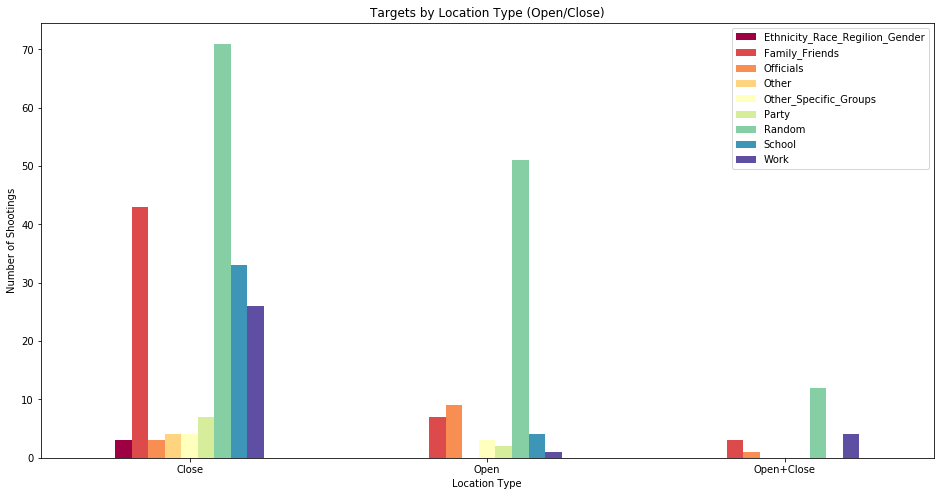

In [18]:
#Create a reg plot and using matplotlib & edit it
lt1=LOC_by_TGroup1.plot(kind='bar', figsize=[16,8], title='Targets by Location Type (Open/Close)', colormap='Spectral')
lt1.set_ylabel('Number of Shootings')
lt1.set_xlabel('Location Type')
plt.xticks(rotation=0)
lt1.legend(loc='best')
plt.show()

In [19]:
#Same thing but this time group in opposite formation (to graph later)
TGroup2=dfTarget.groupby(['Target','LocationOC'])
LOC_by_TGroup2 = TGroup2.size().unstack()
LOC_by_TGroup2

LocationOC,Close,Open,Open+Close
Target,,,
Ethnicity_Race_Regilion_Gender,3.0,NaN,NaN
Family_Friends,43.0,7.0,3.0
Officials,3.0,9.0,1.0
Other,4.0,NaN,NaN
Other_Specific_Groups,4.0,3.0,NaN
Party,7.0,2.0,NaN
Random,71.0,51.0,12.0
School,33.0,4.0,NaN
Work,26.0,1.0,4.0


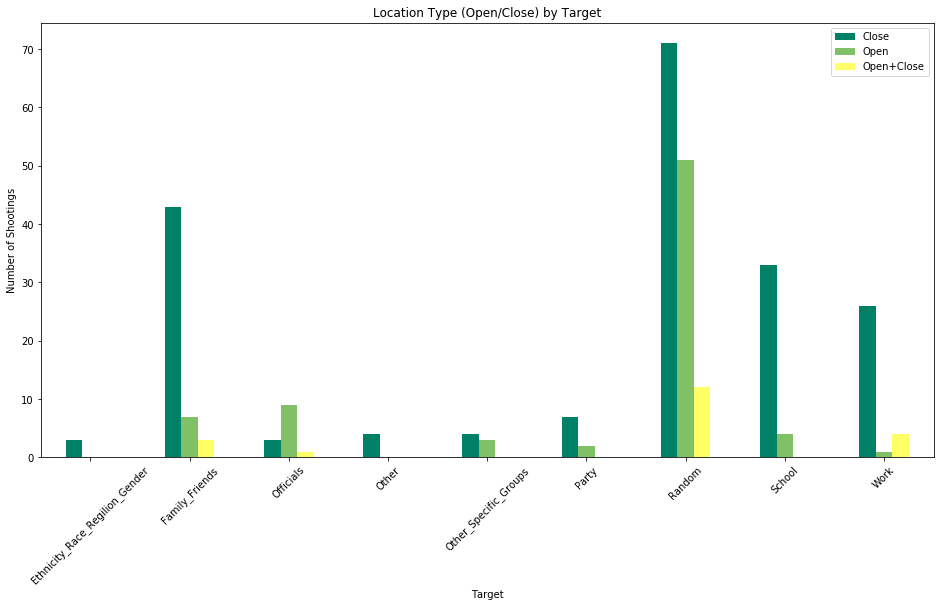

In [20]:
#Graph 
lt2=LOC_by_TGroup2.plot(kind='bar', figsize=[16,8],title='Location Type (Open/Close) by Target', colormap='summer')
lt2.set_xlabel('Target')
lt2.set_ylabel('Number of Shootings')
plt.xticks(rotation=45)
lt2.legend(loc='best')
plt.show()

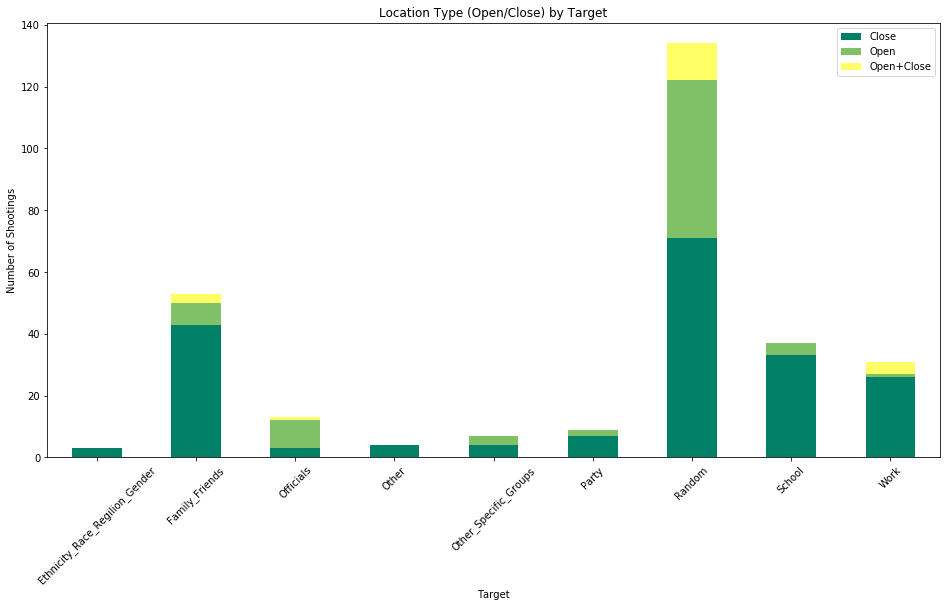

In [21]:
#Stacking bars to view it differently
lt2Stacked=LOC_by_TGroup2.plot(kind='bar', figsize=[16,8], stacked=True,title='Location Type (Open/Close) by Target', colormap='summer')
lt2Stacked.set_xlabel('Target')
lt2Stacked.set_ylabel('Number of Shootings')
plt.xticks(rotation=45)
lt2Stacked.legend(loc='best')
plt.show()

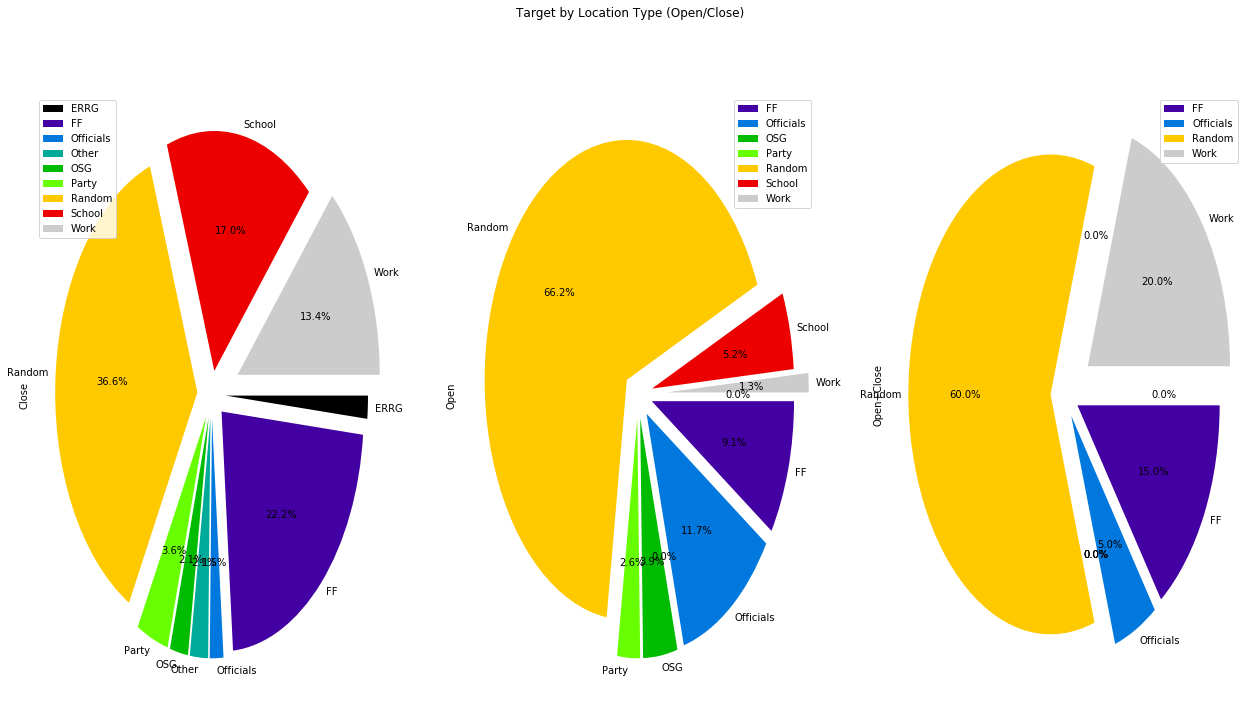

In [23]:
#Pie chart
labels=('ERRG','FF','Officials','Other','OSG','Party','Random','School','Work')
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.2)
Plt4=LOC_by_TGroup2.plot(kind='pie',explode=explode,labels=labels,labeldistance=1.05, figsize=[21.25,12.25], subplots=True,autopct='%2.1f%%',title='Target by Location Type (Open/Close)',counterclock=False, colormap='nipy_spectral')
plt.xticks(rotation=60)
plt.subplots_adjust(left=0.11, bottom=0.2, right=0.9)
plt.legend(loc='upper right')
plt.show()

## Section 2: Location(Open/Close) and Cause

### Data Preparation: Locations(Open/Close) and Cause

In [24]:
dfCause=copy.deepcopy(df)
#First, remove rows with empty cells
dfCause.dropna(subset = ['Cause'], inplace = True)
dfCause.Cause.unique()

array(['unknown', 'terrorism', 'unemployement', 'racism', 'frustration',
       'domestic dispute', 'anger', 'psycho', 'revenge',
       'domestic disputer', 'suspension', 'religious radicalism',
       'failing exams', 'robbery'], dtype=object)

In [25]:
#To avoid any syntax errors 
dfCause.loc[dfCause.Cause=='domestic dispute','Cause']='domestic_dispute'
dfCause.loc[dfCause.Cause=='domestic disputer','Cause']='domestic_dispute'
dfCause.loc[dfCause.Cause=='religious radicalism','Cause']='religious_radicalism'
dfCause.loc[dfCause.Cause=='failing exams','Cause']='failing_exams'
dfCause.Cause.unique()

array(['unknown', 'terrorism', 'unemployement', 'racism', 'frustration',
       'domestic_dispute', 'anger', 'psycho', 'revenge', 'suspension',
       'religious_radicalism', 'failing_exams', 'robbery'], dtype=object)

### Data Analysis: Location(Open/Close) and Cause

#### _ Table, Bar Graph & Pie Chart _ 

In [26]:
#Grouping columns again
CGroup1=dfCause.groupby(['LocationOC', 'Cause'])
LOC_by_CGroup1=CGroup1.size().unstack()
LOC_by_CGroup1

Cause,anger,domestic_dispute,failing_exams,frustration,psycho,racism,religious_radicalism,revenge,robbery,suspension,terrorism,unemployement,unknown
LocationOC,,,,,,,,,,,,,
Close,25.0,8.0,3.0,12.0,39.0,2.0,NaN,8.0,1.0,1.0,44.0,8.0,2.0
Open,16.0,4.0,NaN,4.0,9.0,3.0,1.0,NaN,NaN,NaN,14.0,1.0,2.0
Open+Close,2.0,NaN,NaN,1.0,9.0,NaN,NaN,1.0,NaN,NaN,5.0,1.0,NaN


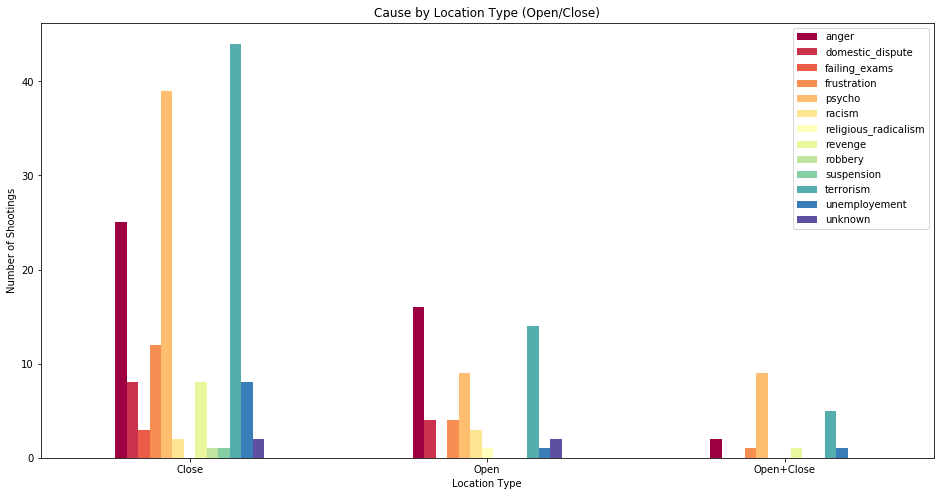

In [27]:
#Same concept as before with different data (Cause)
lc1=LOC_by_CGroup1.plot(kind='bar', figsize=[16,8],title='Cause by Location Type (Open/Close)', colormap='Spectral')
lc1.set_ylabel('Number of Shootings')
lc1.set_xlabel('Location Type')
plt.xticks(rotation=0)
lc1.legend(loc='best')
plt.show()

In [28]:
#switching x and y
CGroup2=dfCause.groupby([ 'Cause', 'LocationOC'])
LOC_by_CGroup2=CGroup2.size().unstack()
LOC_by_CGroup2

LocationOC,Close,Open,Open+Close
Cause,,,
anger,25.0,16.0,2.0
domestic_dispute,8.0,4.0,NaN
failing_exams,3.0,NaN,NaN
frustration,12.0,4.0,1.0
psycho,39.0,9.0,9.0
racism,2.0,3.0,NaN
religious_radicalism,NaN,1.0,NaN
revenge,8.0,NaN,1.0
robbery,1.0,NaN,NaN


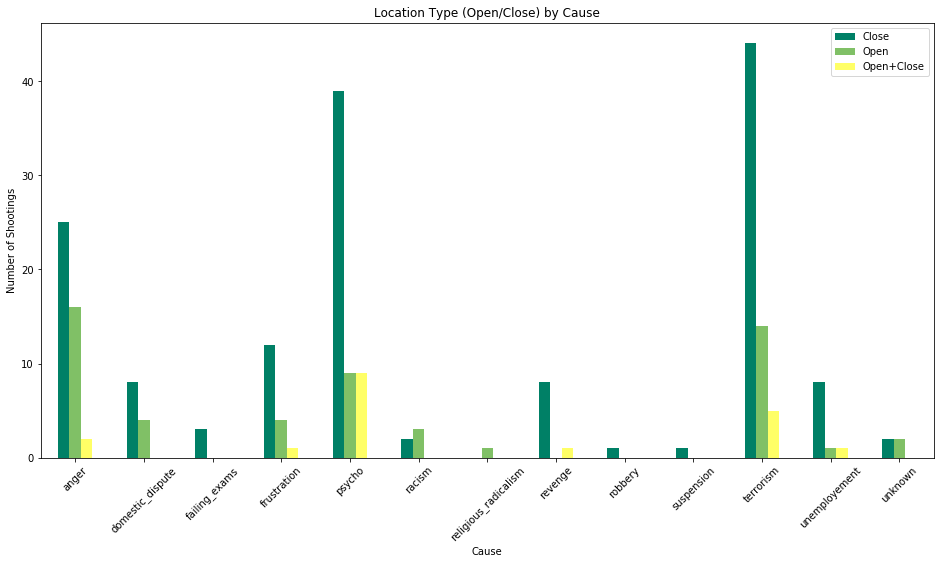

In [29]:
#graphing switched x and y
lc2=LOC_by_CGroup2.plot(kind='bar', figsize=[16,8],title='Location Type (Open/Close) by Cause', colormap='summer')
lc2.set_xlabel('Cause')
lc2.set_ylabel('Number of Shootings')
plt.xticks(rotation=45)
lc2.legend(loc='best')
plt.show()


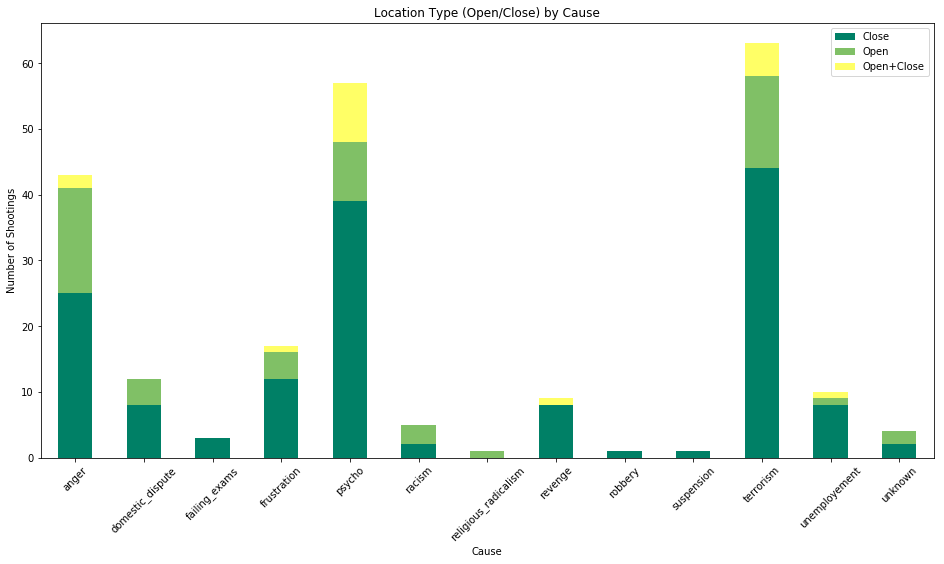

In [30]:
#Stacked Graph
lc2Stacked=LOC_by_CGroup2.plot(kind='bar', stacked=True, figsize=[16,8],title='Location Type (Open/Close) by Cause', colormap='summer')
lc2Stacked.set_xlabel('Cause')
lc2Stacked.set_ylabel('Number of Shootings')
plt.xticks(rotation=45)
lc2Stacked.legend(loc='best')
plt.show()


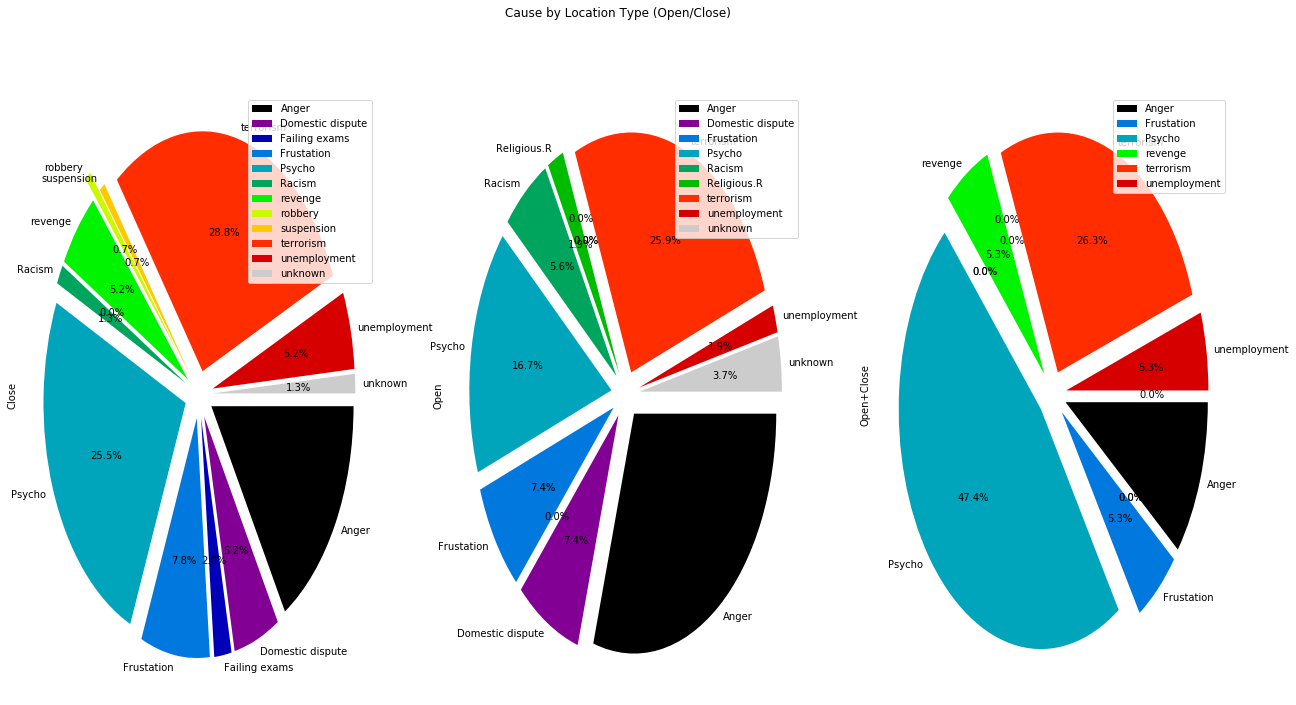

In [35]:
# Pie chart
labels=('Anger','Domestic dispute','Failing exams','Frustation','Psycho','Racism','Religious.R','revenge','robbery','suspension','terrorism','unemployment','unknown')
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.2,0.1,0.1,0.1,0.1)
plt5=LOC_by_CGroup2.plot(kind='pie',explode=explode, figsize=[21.25,12.25],labels=labels,labeldistance=1.05, subplots=True,autopct='%1.1f%%',title='Cause by Location Type (Open/Close)',counterclock=False, colormap='nipy_spectral')
plt.legend(loc='upper right')
plt.subplots_adjust(left=0.11, bottom=0.2, right=0.9)
plt.xticks(rotation=60)
plt.show()

## Section 3: Location(Open/Close) Time Series

### Data Preparation: Location(Open/Close) Time Series

In [36]:
#Preparing data for Time Series
import datetime
import dateutil
from datetime import datetime
from dateutil import parser

dfDateAll=copy.deepcopy(df)

drop_list = [ 'Title', 'Location', 'IncidentArea', 'Target','Cause', 'Summary' ,'Fatalities', 'Injured', 'TotalVictims','PolicemanKilled','Age', 'Employeed(Y/N)', 'EmployedAt', 'MentalHealthIssues', 'Race', 'Gender', 'Latitude', 'Longitude']
for i in range (0, len(drop_list), 1):
    del dfDateAll[drop_list[i]]


In [37]:
#Changing the dates to keep only the year since data will be analyzed by year 
dfDateAll.DateT = pd.to_datetime(dfDateAll.DateT).dt.strftime('%Y')
dfDateAll.head()

,DateT,LocationOC
S#,,
1,2017,Close
2,2017,Open
3,2017,Close
4,2017,Open
5,2017,Close


In [38]:
#To confirm data is being grouped by year
dfDateAll.groupby('DateT')['LocationOC'].count()

DateT
1966     2
1971     1
1974     2
1976     2
1979     2
1982     2
1983     2
1984     3
1985     2
1986     3
1987     1
1988     6
1989     3
1991     5
1992     3
1993     9
1994     4
1995     4
1996     2
1997     5
1998     5
1999     5
2000     1
2001     2
2002     2
2003     3
2004     2
2005     3
2006     5
2007    10
2008     6
2009     8
2010     2
2011     6
2012    14
2013    15
2014    13
2015    56
2016    64
2017    10
Name: LocationOC, dtype: int64

### Data Analysis: Location(Open/Close) Time Series

In [39]:
#Create a table to organize LocationOC by Year 
byYear=dfDateAll.groupby(['DateT','LocationOC'])
count_byYear=byYear.size().unstack()
TS=count_byYear
TS.head()

LocationOC,Close,Open,Open+Close
DateT,,,
1966,2.0,NaN,NaN
1971,1.0,NaN,NaN
1974,1.0,NaN,1.0
1976,2.0,NaN,NaN
1979,1.0,1.0,NaN


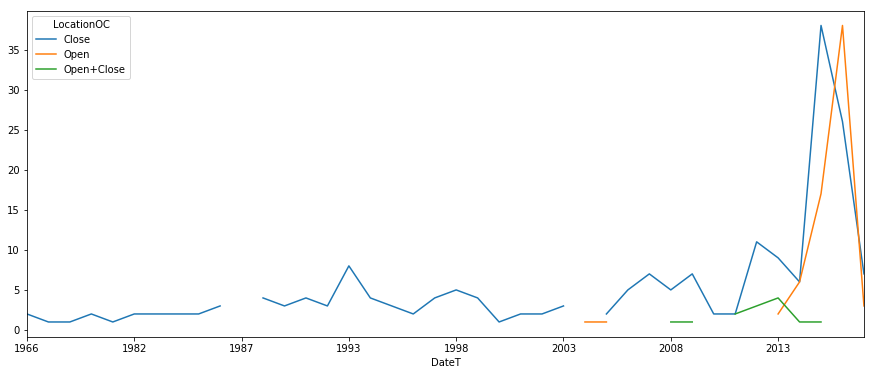

In [40]:
#Time Series
TS.plot()

#### End of Notebook